In [1]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import kruskal
from scipy import stats

In [2]:
urban_population = pd.read_csv('C:\\Users\\rayde\\iCloudDrive\\GitHub\\Python\\Data Project\\share-of-population-urban.csv')

In [3]:
income_taxes = pd.read_csv("C:\\Users\\rayde\\iCloudDrive\\GitHub\\Python\\Data Project\\taxes-on-incomes-of-individuals-and-corporations-gdp.csv")

In [4]:
urban_population.columns

Index(['Entity', 'Code', 'Year', 'Urban_Population'], dtype='object')

In [5]:
income_taxes.columns

Index(['Entity', 'Code', 'Year', 'Tax_Percent_GDP'], dtype='object')

In [6]:
urban_population.describe()

,Year
count,15072.000000
mean,1988.545382
std,16.737532
min,1960.000000
25%,1974.000000
50%,1989.000000
75%,2003.000000
max,2017.000000


In [7]:
income_taxes.describe()

,Year,Tax_Percent_GDP
count,4871.000000,4871.000000
mean,2000.872716,6.538407
std,9.803376,4.915040
min,1980.000000,0.000000
25%,1994.000000,2.903660
50%,2001.000000,5.455395
75%,2009.000000,8.992646
max,2017.000000,32.075305


In [8]:
urban_population.head()

,Entity,Code,Year,Urban_Population
0,Afghanistan,AFG,1960,8.401
1,Afghanistan,AFG,1961,8.684
2,Afghanistan,AFG,1962,8.976
3,Afghanistan,AFG,1963,9.276
4,Afghanistan,AFG,1964,9.586


In [9]:
income_taxes.head()

,Entity,Code,Year,Tax_Percent_GDP
0,Afghanistan,AFG,2003,0.165953
1,Afghanistan,AFG,2004,0.411647
2,Afghanistan,AFG,2005,0.320864
3,Afghanistan,AFG,2006,1.261181
4,Afghanistan,AFG,2007,1.323461


# Clean Data

In [10]:
urban_population['Urban_Population'] = urban_population['Urban_Population'].apply(lambda x: x.strip('%'))

In [11]:
# Entity feature may need cleaning
df = urban_population[['Entity', 'Code']].groupby('Entity').count().sort_values(by='Code')
entities = list(df[df['Code'] < 20].index)
urban_population[urban_population['Entity'].isin(entities)]

,Entity,Code,Year,Urban_Population
20,x,AFG,1980,15.995
45,x,AFG,2005,22.703
103,sjke,ALB,2005,46.731
335,rehojher,AGO,2005,56
406,Arab World,NaN,1960,31.2919740510562
...,...,...,...,...
14545,Upper middle income,NaN,2013,62.0239702411369
14546,Upper middle income,NaN,2014,62.8955804803787
14547,Upper middle income,NaN,2015,63.7564165827109
14548,Upper middle income,NaN,2016,64.6076009024922


In [12]:
# Create a dictionary of key value pairs that map the entity code to the correct entity 
Entity_Code_Mapping = urban_population[['Code', 'Entity']].groupby('Code').agg({'Entity': lambda x:x.value_counts().index[0]}).to_dict()
entity_code_map = Entity_Code_Mapping.get('Entity')

In [13]:
#Replace entity in the dataframe with the dictionary value 
for key, value in entity_code_map.items():
    urban_population.loc[urban_population['Code']==key, 'Entity'] = value 

In [14]:
urban_population[['Code', 'Urban_Population']].groupby('Code').count().head()

,Urban_Population
Code,
ABW,58
AFG,58
AGO,58
ALB,58
AND,58


In [15]:
urban_population[['Year', 'Urban_Population']].groupby('Year').count().head()

,Urban_Population
Year,
1960,259
1961,259
1962,259
1963,259
1964,259


#### Merge the two datasets such that the resultant dataset contains only the intersection of the rows present in both files.

In [16]:
merged = pd.merge(urban_population, income_taxes, how='inner', on=['Entity', 'Code', 'Year'])

In [17]:
merged.columns

Index(['Entity', 'Code', 'Year', 'Urban_Population', 'Tax_Percent_GDP'], dtype='object')

In [18]:
merged.describe()

,Year,Tax_Percent_GDP
count,4827.000000,4827.000000
mean,2000.820178,6.541745
std,9.820962,4.916074
min,1980.000000,0.000000
25%,1994.000000,2.913485
50%,2001.000000,5.453483
75%,2009.000000,8.963828
max,2017.000000,32.075305


In [19]:
#Unbalanced Panel Data
merged[['Entity', 'Year']].groupby('Entity').count().sort_values(by='Year').head()

,Year
Entity,
Algeria,2
Bahamas,2
Iran,2
Somalia,5
Congo,6


In [20]:
merged['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS',
       'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL', 'BLZ',
       'BEN', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'BRN', 'BGR', 'BFA',
       'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CAF', 'CHL', 'CHN', 'COM',
       'COG', 'CRI', 'CIV', 'HRV', 'CUB', 'CYP', 'CZE', 'COD', 'DNK',
       'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST',
       'FJI', 'FIN', 'FRA', 'GMB', 'GEO', 'DEU', 'GHA', 'GRC', 'GRD',
       'GTM', 'GIN', 'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL',
       'IND', 'IDN', 'IRN', 'IRL', 'ISR', 'ITA', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBY', 'LTU', 'LUX', 'MAC', 'MKD', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MHL', 'MRT', 'MUS', 'MEX', 'FSM', 'MDA', 'MNG',
       'MNE', 'MAR', 'MOZ', 'MMR', 'NAM', 'NPL', 'NLD', 'NZL', 'NIC',
       'NER', 'NGA', 'NOR', 'OMN', 'PAK', 'PLW', 'PSE', 'PAN', 'PNG',
       'PRY', 'PER',

In [21]:
merged['Year'].sort_values().unique()

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017], dtype=int64)

In [22]:
merged['Urban_Population'] = merged['Urban_Population'].astype('float64')

#### Export the results to a new file called merged_social_data.csv.

In [23]:
merged.to_csv('merged_social_data.csv')

# Exploratory Analysis

In [24]:
merged.describe()

,Year,Urban_Population,Tax_Percent_GDP
count,4827.000000,4827.000000,4827.000000
mean,2000.820178,54.563982,6.541745
std,9.820962,24.087069,4.916074
min,1980.000000,4.674000,0.000000
25%,1994.000000,34.051500,2.913485
50%,2001.000000,54.987000,5.453483
75%,2009.000000,74.335500,8.963828
max,2017.000000,100.000000,32.075305


In [25]:
merged.dtypes

Entity               object
Code                 object
Year                  int64
Urban_Population    float64
Tax_Percent_GDP     float64
dtype: object

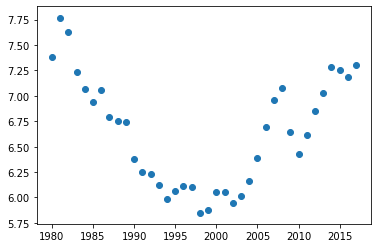

In [26]:
scatter = merged[['Year','Tax_Percent_GDP']].groupby('Year').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

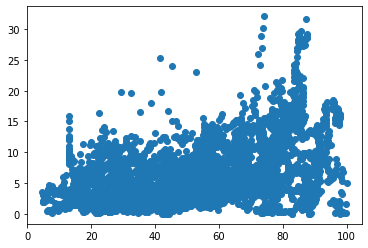

In [27]:
scatter = merged[['Urban_Population','Tax_Percent_GDP']].groupby('Urban_Population').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

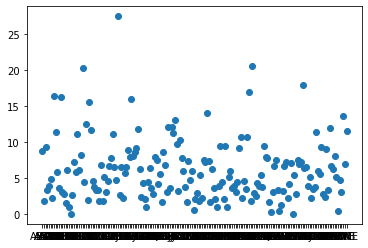

In [28]:
scatter = merged[['Code','Tax_Percent_GDP']].groupby('Code').mean()
plt.scatter(scatter.index, scatter['Tax_Percent_GDP'])

# OLS Regression
#### Using the merged results, generate an ordinary least squares regression showing the effect of the independent variable Urban_Population on the dependent variable Tax_Percent_GDP.

#### a. The R squared of the results: 
<p> The R-squared of the results is .189, meaning that the model explains 18.9% of the variation in Tax_Percent_GDP. </p>

#### b. The t-statistic and p-value of the coefficient and intercept: 
<p> The coefficient on Urban_Population has a t-statistic of 33.507 and a p-value of 0.000. <br>
The coefficient on the intercept has a t-statistic of 10.797 and a p-value of 0.000. <br>
The model has 1 degrees of freedom equal to the number of independent variables. <br>
The spread of the residuals is between -10.422492141267965 and 23.787454001985385. <br>
</p>

In [29]:
result = smf.ols(formula='Tax_Percent_GDP ~ Urban_Population', data=merged).fit()

In [30]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Tax_Percent_GDP   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     1127.
Date:                Sun, 31 Jan 2021   Prob (F-statistic):          3.38e-222
Time:                        13:51:23   Log-Likelihood:                -14029.
No. Observations:                4827   AIC:                         2.806e+04
Df Residuals:                    4825   BIC:                         2.808e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6963      0.158     10.751      0.000       1.387       2.006
Urban_Population     0.0888      0.003     33.567      0.000       0.084       0.094
==============================================================================
Omnibus:                      888.216   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2171.610
Skew:                           1.021   Prob(JB):                         0.00
Kurtosis:                       5.574   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
influence = OLSInfluence(result)
print(influence.resid.min() , "-" , influence.resid.max())

-10.42817081998003 - 23.785213651195477


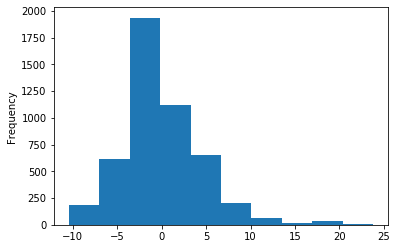

In [32]:
influence.resid.plot.hist()

# Summarize your results

<p> <b> Describe the relationship between the independent and dependent variable and your interpretation of its significance.</b><br>
On average, when the urban population increases by 1%, the tax rate as a percent of GDP increases by 0.0888%. This relationship is statistically significant at the .01 confidence level with a t-statistic of 33.5 and a p-value of 0.000.</p>

<p> <b> What were some challenges you encountered in generating the dataset for analysis, if any? </b> <br>
1. The Urban_Population variable is a string with the % symbol in one of the observations. This made it challenging to convert the column to a numeric data type. However, this complication was easily fixed by removing the string characters from the column before converting it to a numeric data type. <br><br>
2. The Entity column in the urban_population data set had typos. I rectified this complication by creating a dictionary that maps entities to codes. I used this dictionary to replace all the values in the Entity column with the appropriate entity based on the values in the Code column. <br>      
    
<b> Based on this initial model, what steps might you take next to validate or extend your analysis, if any? </b> <br>
Well, we only include one variable, "Urban_Population", in this model. Thus, the model may suffer from omitted-variable bias. As a result, some of the effect of these missing variables could be included in the coefficient on Urban_Population. The next step to extend the analysis would be identifying other relevant variables to include in the model specification. <br> <br>
When adding these variables, I would watch how the coefficients and standard errors on Urban_Population and the intercept changes. Any large changes in the standard error or coefficient on Urban_Population may indicate that the new variable may be either removing bias or introducing bias. If the intercept changes values drastically, then the new variable may need to be rescaled. For example, introducing an independent variable in absolute terms might cause the intercept to drastically increase in the model because the dependent variable is in percentage terms.
<br><br>
Adding a variable that is highly correlated with another independent variable would increase the standard error on the variable. Ideally, I would examine the correlation between any independent variables in the model and test for multicollinearity possibly by using the variance inflation factor, which measures the increase in the estimated coefficient variance from correlation. Estimates would still be unbiased and efficient, but standard errors would increase, decreasing the likelihood that a coefficient is reported as statistically significant.
    
I would also want to analyze whether or not I am under or overfitting the data. So, I might also split the data into testing and training sets using stratified sampling to account for the unbalanced panel data (by country and year). Then I can compare the results between the sets to see how the model reacts when introduced to new data. 
    
<b> If you were asked to study this relationship, how would you convey your findings? </b> <br>
How I would convey my findings would depend on the audience. I would take into account whether or not the audience is an internal or external client and the title(s) of the audience. For an external client, I would choose the most crucial insights from the analysis and create 1 to 3 graphics to visualize the relationship. In this case, the primary relationship under consideration is that between urban population and tax percentage of GDP. For this data, I might use the interquartile range to split the data into four groups [(0%-25%)(25%-50%)(50%-75%)(75%-100%)] and then create a bar chart showing the mean tax rate as a percentage of GDP for each of those groups.
    
<br> I would also make an hypothesis statement like "The percentage of the population living in urban areas is associated with the tax rate as a percentage of GDP" or "Higher rates of urban residency is associated with higher tax rates as a percentage of GDP." Then, I would test that hypothesis by running a regression and hypothesis tests. To choose an appropriate hypothesis test, I would begin by running a normality test on the data. If the data doesn't follow the normal distribution, I would choose a nonparametric test of significance like Chi square test of independence or Kruskal–Wallis. Otherwise, I would use the t-test or ANOVA to test the hypothesis. These tests are also useful to make decisions on what variables to include or leave out of a regression. 

While I wouldn't want to convey my findings in an overly complex way to some audiences, I would want to convey the results with at least one statistical test to show the client that expertise went into validating our conclusions. 
</p> 

In [33]:
q3, q2, q1 = np.percentile(merged['Urban_Population'], [75, 50, 25])

In [34]:
merged['Urban_Population_Quartile'] = 0
merged.loc[merged['Urban_Population']>=q3, 'Urban_Population_Quartile'] = 3
merged.loc[(merged['Urban_Population']>=q2) & (merged['Urban_Population']<q3), 'Urban_Population_Quartile'] = 2
merged.loc[(merged['Urban_Population']>=q1) & (merged['Urban_Population']<q2), 'Urban_Population_Quartile'] = 1

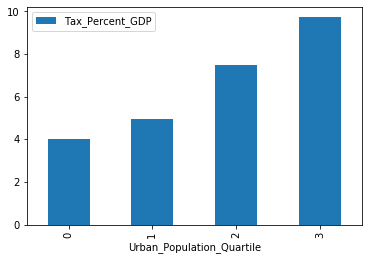

In [35]:
merged[['Urban_Population_Quartile', 'Tax_Percent_GDP']].groupby('Urban_Population_Quartile').mean().plot.bar()

In [36]:
stats.normaltest(merged['Urban_Population'],axis = 0, nan_policy='omit')

NormaltestResult(statistic=1421.7894499318638, pvalue=1.82954768425399e-309)

In [37]:
stat, p =  kruskal(merged.loc[merged['Urban_Population_Quartile']==0,'Tax_Percent_GDP'],merged.loc[merged['Urban_Population_Quartile']==1,'Tax_Percent_GDP'],merged.loc[merged['Urban_Population_Quartile']==2,'Tax_Percent_GDP'], merged.loc[merged['Urban_Population_Quartile']==3,'Tax_Percent_GDP'])

In [39]:
print(f'Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=932.766, p=0.000


In [40]:
stats.f_oneway(merged.loc[merged['Urban_Population_Quartile']==0,'Tax_Percent_GDP'],merged.loc[merged['Urban_Population_Quartile']==1,'Tax_Percent_GDP'],merged.loc[merged['Urban_Population_Quartile']==2,'Tax_Percent_GDP'], merged.loc[merged['Urban_Population_Quartile']==3,'Tax_Percent_GDP'])

F_onewayResult(statistic=416.8258717933554, pvalue=9.141856550380467e-241)